In [434]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [435]:
load_dotenv()

True

In [436]:
# Retrieve API keys for Alpaca
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [437]:
# Create REST object for Alpaca calls
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [465]:
tickers = ["FB", "AAPL", "AMZN", "NFLX", "GOOG"]
btc_ticker = ["BTCUSD"]
timeframe = "1Day"
years_for_analysis = [
    "closing_prices_2016", 
    "closing_prices_2017", 
    "closing_prices_2018", 
    "closing_prices_2019", 
    "closing_prices_2020", 
    "closing_prices_2021", 
    "closing_prices_2022",
]
df_list = {}
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-20", tz="America/New_York").isoformat()

In [466]:
initial_closing_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

initial_closing_prices.index = initial_closing_prices.index.date
initial_closing_prices

,open,high,low,close,volume,trade_count,vwap,symbol
2015-12-01,118.73,118.81,116.860,117.34,34852374,187129,117.756760,AAPL
2015-12-02,117.00,118.11,116.080,116.28,33385643,180616,117.151198,AAPL
2015-12-03,116.55,116.79,114.220,115.20,41560785,245330,115.434888,AAPL
2015-12-04,115.20,119.25,115.110,119.03,57776977,307788,118.187290,AAPL
2015-12-07,118.98,119.86,117.810,118.28,32080754,190809,118.509111,AAPL
...,...,...,...,...,...,...,...,...
2022-04-13,343.92,352.00,341.155,350.43,3206212,86528,348.663577,NFLX
2022-04-14,350.95,352.00,339.860,341.13,4335637,104039,343.169252,NFLX
2022-04-18,340.00,342.36,331.615,337.86,5095061,131961,336.501791,NFLX
2022-04-19,333.22,351.68,333.220,348.61,20898987,427721,301.205417,NFLX


In [467]:
btc_closing_prices = alpaca.get_crypto_bars(
    btc_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

btc_closing_prices = btc_closing_prices[~btc_closing_prices.index.duplicated(keep='first')]
btc_closing_prices.index = btc_closing_prices.index.drop_duplicates()
btc_closing_prices.index = btc_closing_prices.index.date
btc_closing_prices

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2015-01-07,CBSE,360.00,360.00,264.81,275.44,6.420000,634,298.877741,BTCUSD
2015-01-08,CBSE,297.08,314.91,265.50,288.99,3.930000,393,289.251781,BTCUSD
2015-01-12,CBSE,260.00,260.00,260.00,260.00,1.000000,1,260.000000,BTCUSD
2015-01-13,CBSE,200.00,221.00,200.00,219.63,0.030000,3,213.543333,BTCUSD
2015-01-14,CBSE,220.00,220.00,109.87,120.00,11.274638,1115,155.605993,BTCUSD
...,...,...,...,...,...,...,...,...,...
2022-04-15,CBSE,40113.36,40850.00,39950.00,40545.39,6119.131320,424598,40345.597302,BTCUSD
2022-04-16,CBSE,40545.39,40699.99,40005.00,40299.60,3816.288715,312733,40337.494118,BTCUSD
2022-04-17,CBSE,40299.13,40605.46,38708.52,38839.10,6467.496525,363448,39900.895649,BTCUSD
2022-04-18,CBSE,38839.92,41268.44,38550.00,40868.59,12415.506161,547797,39969.599348,BTCUSD


In [468]:
btc_closing_prices.index = pd.to_datetime(btc_closing_prices.index)
btc_closing_prices.loc['2022-04-19', "close"]

41363.69

In [469]:
fb = initial_closing_prices[initial_closing_prices["symbol"] == "FB"]
aapl = initial_closing_prices[initial_closing_prices["symbol"] == "AAPL"]
amzn = initial_closing_prices[initial_closing_prices["symbol"] == "AMZN"]
nflx = initial_closing_prices[initial_closing_prices["symbol"] == "NFLX"]
goog = initial_closing_prices[initial_closing_prices["symbol"] == "GOOG"]

closing_prices["FB"] = fb["close"]
closing_prices["AAPL"] = aapl["close"]
closing_prices["AMZN"] = amzn["close"]
closing_prices["NFLX"] = nflx["close"]
closing_prices["GOOG"] = goog["close"]
closing_prices["BTC"] = btc_closing_prices["close"]
closing_prices = closing_prices.dropna()
closing_prices.index = pd.to_datetime(closing_prices.index)
closing_prices.head()


,AAPL,FB,AMZN,NFLX,GOOG,BTC
2015-12-04,119.03,106.18,672.64,130.93,766.81,363.98
2015-12-07,118.28,105.61,669.83,125.36,763.25,394.73
2015-12-08,118.23,106.49,677.33,126.98,762.37,417.76
2015-12-09,115.62,104.60,664.79,124.20,751.61,418.39
2015-12-10,116.17,105.42,662.32,122.91,749.46,422.33


In [470]:
# closing_prices_2016 = closing_prices.loc["2016-01-01":"2016-12-31"]
# closing_prices_2017 = closing_prices.loc["2017-01-01":"2017-12-31"]
# closing_prices_2018 = closing_prices.loc["2018-01-01":"2018-12-31"]
# closing_prices_2019 = closing_prices.loc["2019-01-01":"2019-12-31"]
# closing_prices_2020 = closing_prices.loc["2020-01-01":"2020-12-31"]
# closing_prices_2021 = closing_prices.loc["2021-01-01":"2021-12-31"]
# closing_prices_2022 = closing_prices.loc["2022-01-01":"2022-04-19"]

In [477]:
for year in years_for_analysis:
    temp_df = pd.DataFrame()
    if int(year[15:19]) < 2022:
        start = year[15:19] + "-01-01"
        end = year[15:19] + "-12-31"
    else:
        start = year[15:19] + "-01-01"
        end = year[15:19] + "-04-19"
    year_df = closing_prices.loc[start:end]
    year_df = year_df.pct_change().dropna()
   
    for stock in tickers:
        index_year = year[15:19]
        stock_column = stock
        key = index_year + "_" + stock_column + "_BTC"
        stock_df = pd.DataFrame()
        stock_df["BTC"] = year_df["BTC"]
        stock_df[stock_column] = year_df[stock_column]
        stock_df = stock_df.rolling(window=20).corr().dropna()
        temp_list = stock_df["BTC"].tolist()
        for value in temp_list:
            if value > .99999990:
                temp_list.remove(value)
        temp_df[stock_column + "Corr"] = temp_list
        df_list[key] = temp_df.to_dict()
        
#display(df_list["2019_GOOG_BTC"])
# closing_prices_2016.pct_change().dropna()
# btc_aapl_correlation = pd.DataFrame()
# btc_aapl_correlation["AAPL"] = closing_prices_2016["AAPL"]
# btc_aapl_correlation["BTC"] = closing_prices_2016["BTC"]
# btc_aapl_correlation = btc_aapl_correlation.pct_change().dropna()
# btc_aapl_correlation = btc_aapl_correlation.rolling(window=20).corr()
# btc_aapl_correlation = btc_aapl_correlation.dropna()
# btc_aapl_correlation = btc_aapl_correlation.drop(columns="AAPL")
# btc_aapl_correlation.head(10)

In [472]:
test_list = btc_aapl_correlation["BTC"].tolist()
for value in test_list:
    if value > .99990:
        test_list.remove(value)
closing_prices_2016_aapl_btc = pd.DataFrame()
closing_prices_2016_aapl_btc["AAPL Corr"] = test_list
closing_prices_2016_aapl_btc

,AAPL Corr
0,-0.057945
1,-0.054515
2,-0.021806
3,0.046643
4,0.034179
...,...
227,-0.220439
228,-0.231618
229,-0.301378
230,-0.205833


<AxesSubplot:>

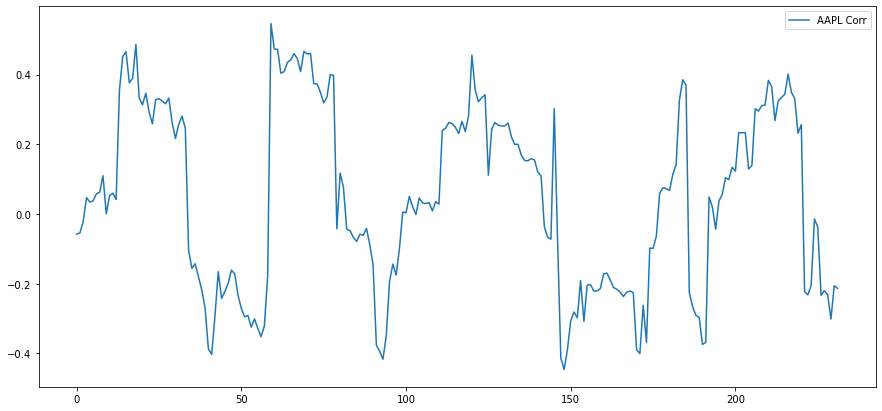

In [360]:
closing_prices_2016_aapl_btc.plot(figsize=(15, 7))